<a href="https://colab.research.google.com/github/alatieh/Claimed-Greening/blob/main/claimed_Greening_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

The biosphere is the most significant and dynamic natural sink and emission of Carbon. The Biosphere "Greening" is often used to describe the increase in vegetation cover and productivity observed in many regions of the world in the latest 50 years. NDVI studies confirmed a general greening trend in terrestrial vegetation. Some studies theorize this phenomenon to the effects of rising CO2 levels in improving plant water use efficiency. The rising CO2 effect on vegetation is known as "CO2 fertilization". In comparison, others point to the role of direct human management of forests and agriculture, in addition to fertilization with nitrogen. However, this Greening is hard to explain and attribute proportionally to the corresponding factor.

The problem is that the term "Greening" may be misleading, as it does not reflect the reality of the ongoing anthropogenic degradation, deforestation, biodiversity loss, disruption, acidification, and pollution of the Earth's ecosystems.

CO2 is a key indicator of the biosphere's photosynthesis and respiration, which reflects the health and activity of all living systems on Earth, including the oceans. Unlike NDVI, which measures only the surface reflectance of vegetation in the red and near-infrared bands, CO2 can provide a more comprehensive and reliable signal of the biosphere's vitality. In this research, I challenge the "Greening" claim using CO2 measurements from various locations worldwide. I will begin with the latest state of the art using the Global Carbon Project GCP report then I will compare my results and analysis to discuss the implications for our understanding of global change.

In [ ]:
# Import any needed package
import os
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from datetime import datetime, date, time, timedelta


# Print library versions
print("Numpy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("Seaborn version:", sns.__version__)
print("Latest model run was", datetime.now())

Numpy version: 1.25.2
Pandas version: 1.5.3
Seaborn version: 0.13.1
Latest model run was 2024-02-19 11:22:01.773039


#Global Carbon Project GCP

The data from the Global carbon Project GCP [(Friedlingstein et al., 2022)](https://essd.copernicus.org/articles/14/4811/2022/)

In [ ]:
url = "https://data.icos-cp.eu/licence_accept?ids=%5B%221umMtgeUlhS2Y1YW_Qp94bu3%22%5D"
filename = "Globalcarbon.xlsx"

response = requests.get(url)

if response.status_code == 200:
    with open(filename, "wb") as f:
        f.write(response.content)
    excel_file = pd.ExcelFile(filename)
    sheet_name = "Global Carbon Budget"

    df1 = pd.read_excel(filename, sheet_name='Historical Budget',
                        skiprows=range(15),usecols='A,C:H',parse_dates=[0],index_col=0)
    df1 = df1.iloc[-172:]
    df1.columns = ['land_use_change_emission', 'atmospheric_growth',
       'ocean_sink', 'land_sink', 'cement_carbonation_sink',
       'budget_imbalance']
    df1.fillna(value=0, inplace=True)
    # Check point to nullify the fluxes in df1 only
    #df1 = df1*0


    df2 = pd.read_excel(filename, sheet_name='Fossil Emissions by Category',
                        skiprows=range(8),usecols='A,C:H',parse_dates=[0],index_col=0)
    df2.columns = ['coal_emission',
       'oil_emission', 'gas_emission', 'cement_emission', 'flaring_emission',
       'other_emission']
    df2.fillna(value=0, inplace=True)
    df2 = df2 /1000  # convert from MtC to GtC

    # Check point to nullify the fossil fuel only
    #df2 = df2*0

    #print(df1.head(),df2.head(5))
else:
    print("Failed to download", url)

GCP = pd.concat([df1,df2], axis=1)
time= GCP.index

#len(df)
#GCP.plot();plt.show()

<ipython-input-71-0b581ff47ce8>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.fillna(value=0, inplace=True)


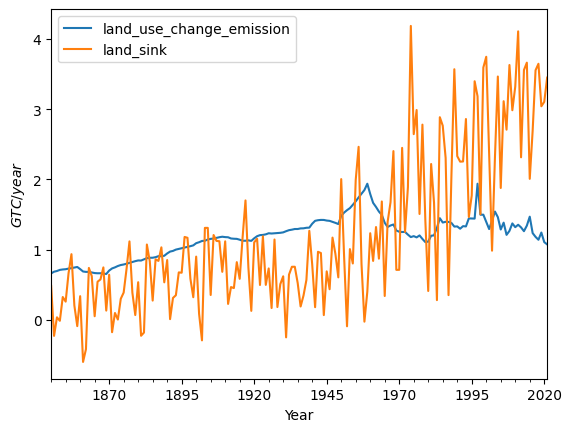

In [ ]:
GCP.land_use_change_emission.plot()
GCP.land_sink.plot()
plt.legend()
plt.ylabel('$GTC / year$')
plt.show()

In [ ]:
GCP.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 172 entries, 1850-01-01 to 2021-01-01
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   land_use_change_emission  172 non-null    float64
 1   atmospheric_growth        172 non-null    float64
 2   ocean_sink                172 non-null    float64
 3   land_sink                 172 non-null    float64
 4   cement_carbonation_sink   172 non-null    float64
 5   budget_imbalance          172 non-null    float64
 6   coal_emission             172 non-null    float64
 7   oil_emission              172 non-null    float64
 8   gas_emission              172 non-null    float64
 9   cement_emission           172 non-null    float64
 10  flaring_emission          172 non-null    float64
 11  other_emission            172 non-null    float64
dtypes: float64(12)
memory usage: 17.5 KB


In [ ]:
print("Absorbed Carbon in the ocean", round(GCP.ocean_sink.sum()), "GtC in total, or half kilo Carbon in every square meter = 1.8 kilo of CO2 in every square meter")

Absorbed Carbon in the ocean 175 GtC in total, or half kilo Carbon in every square meter = 1.8 kilo of CO2 in every square meter


What is the density of Carbonic acid?   
1 101 kg/m3  according to https://en.wikipedia.org/wiki/Carbon_dioxide  
2 540 kg/m³  according to https://www.aqua-calc.com/page/density-table/substance/carbonic-blank-acid  
1 668 kg/m³  according to https://www.lifepersona.com/carbonic-acid-h2co3-properties-uses-and-significance  

so adding Carbon dioxide make the water denser then the volume will shrink?

##plot data

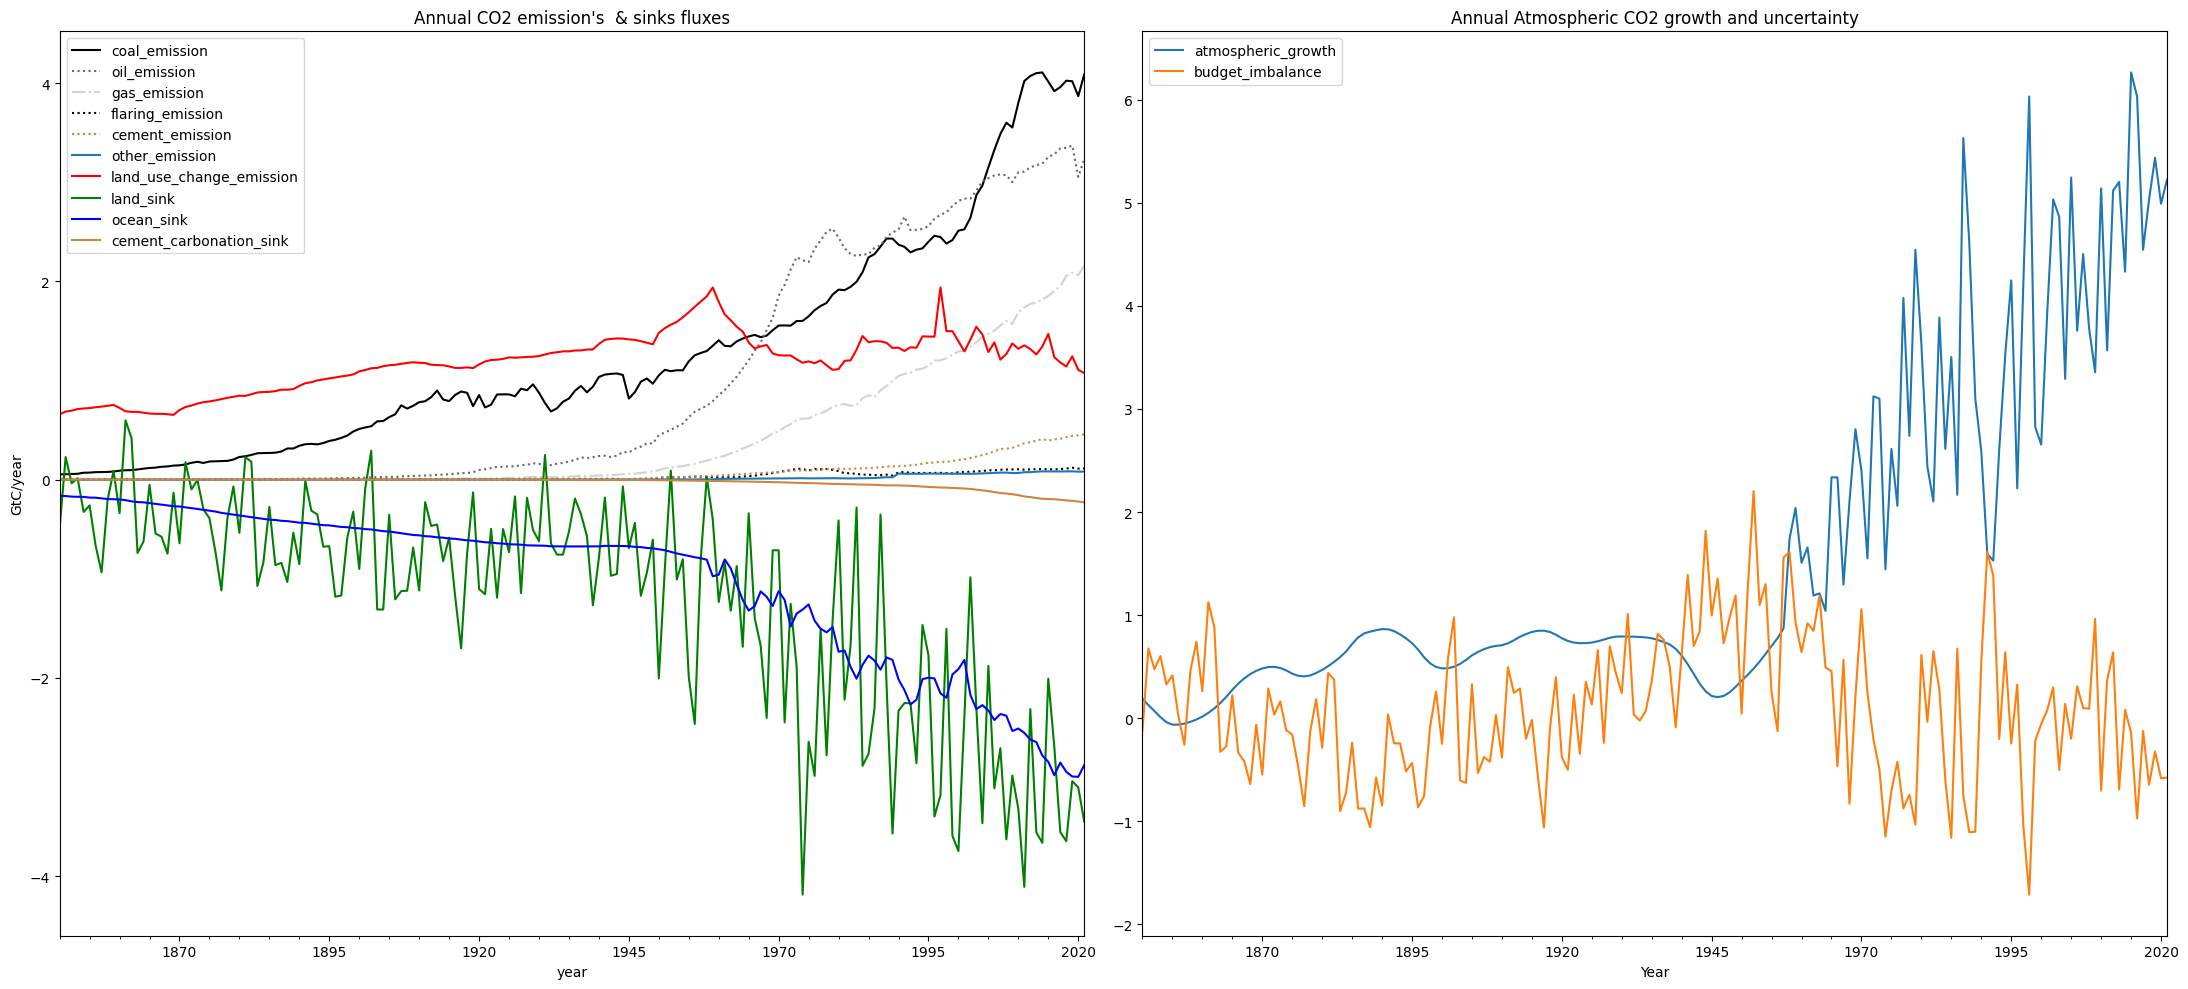

In [ ]:
# check what we have imported
# --------------Visual inspection--------------#
fig, (ax1, ax2) = plt.subplots(1, 2)

#plotting the CO2 emission's  & sinks fluxes
# emissions
plt.subplot(1,2,1)
GCP.coal_emission.plot(figsize=(22, 10),color='black',linestyle='-')
GCP.oil_emission.plot(color='dimgrey',linestyle=':')
GCP.gas_emission.plot(color='lightgrey',linestyle='-.')
GCP.flaring_emission.plot(color='black',linestyle=':')
GCP.cement_emission.plot(color='peru', linestyle=':')
GCP.other_emission.plot()
GCP.land_use_change_emission.plot( color='r')
# sinks
(GCP.land_sink*-1).plot(color='g')
(GCP.ocean_sink*-1).plot(color='b')
(GCP.cement_carbonation_sink*-1).plot(color='peru')

plt.legend()
plt.xlabel("year")
plt.ylabel("GtC/year")
plt.title("Annual CO2 emission's  & sinks fluxes")

#plotting the atmospheric growth and uncertainty
GCP.atmospheric_growth.plot(figsize=(22, 10),ax=ax2)
GCP.budget_imbalance.plot(ax=ax2)
plt.legend()
ax2.set_title("Annual Atmospheric CO2 growth and uncertainty")
ax2.legend()
fig.tight_layout()
plt.show()

## BoxPlot

<ipython-input-76-ca261ecd9ee9>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  boxplot3.set_xticklabels(['land-use change','atm growth','ocean sink','land sink','cement sink','imbalance','coal','oil','gas','cement emisson','flaring','other'], fontsize=12)


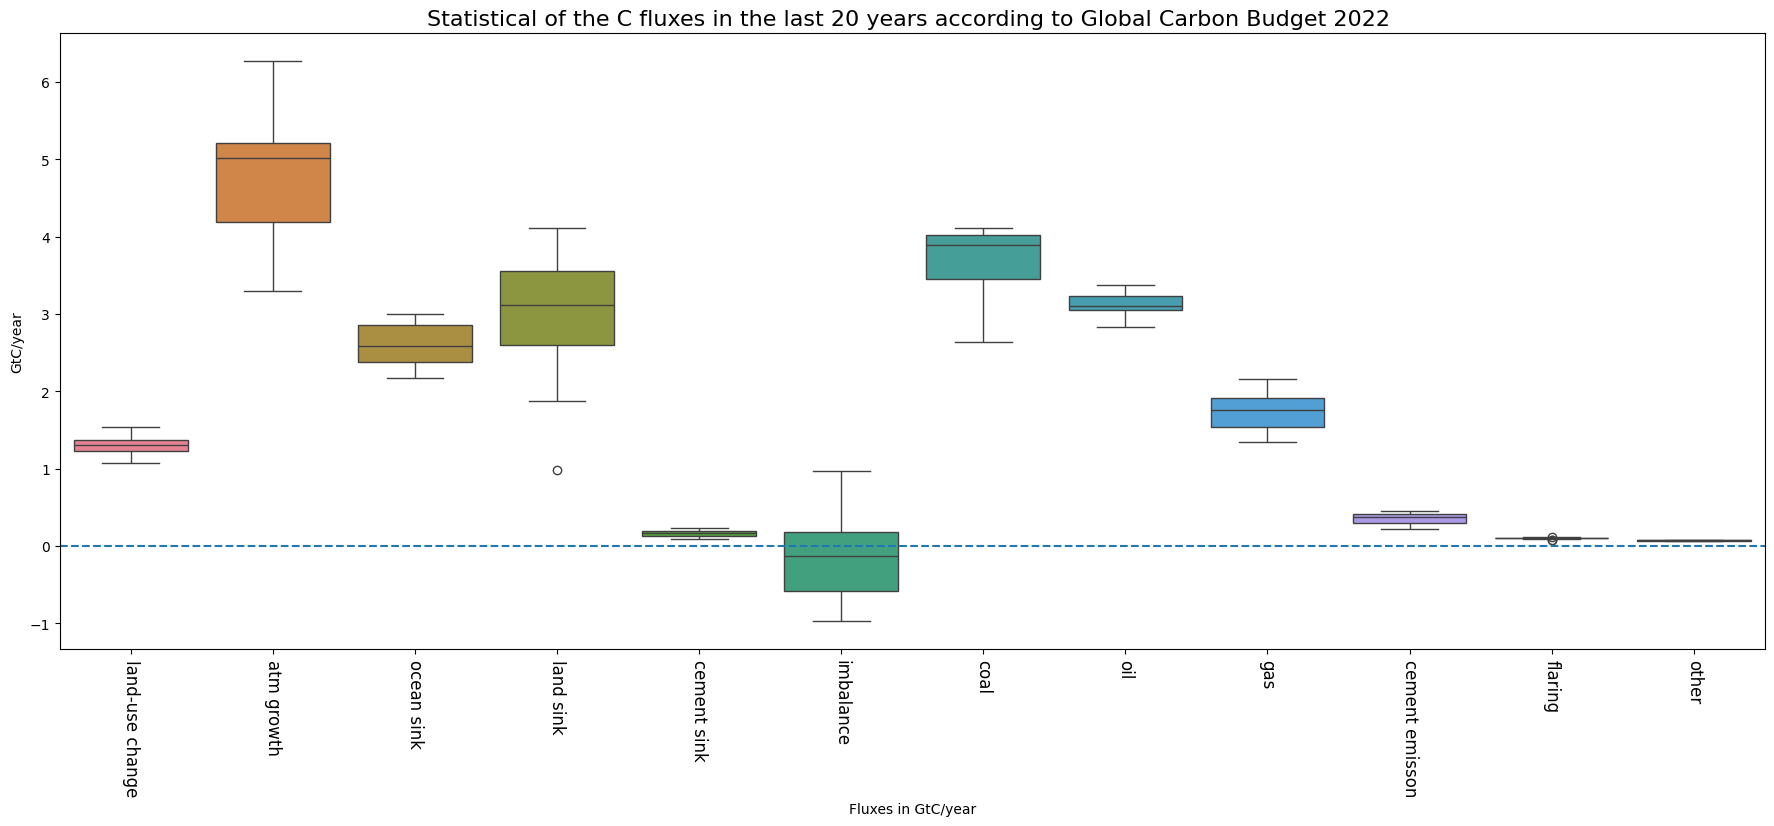

In [ ]:
# --------------Statistical inspection--------------#
#df.describe()
plt.figure(figsize=(22,8))
boxplot3= sns.boxplot(data=GCP.iloc[152:,:])
boxplot3.set(xlabel='Fluxes in GtC/year',ylabel='GtC/year')
boxplot3.axes.set_title("Statistical of the C fluxes in the last 20 years according to Global Carbon Budget 2022 ", fontsize=16)
boxplot3.tick_params(axis='x', labelrotation=270)
boxplot3.set_xticklabels(['land-use change','atm growth','ocean sink','land sink','cement sink','imbalance','coal','oil','gas','cement emisson','flaring','other'], fontsize=12)
boxplot3.axhline(0, linestyle="dashed")
plt.show()

### Visualize the statistical data of the Carbon budget

Here : https://youtu.be/RHU5A3IfDT4  

The plot begins with the whole data set from 1850 till 2021; then, it iterates to reproduce a boxplot for a shorter period. It ends with the fluxes in the last 21 years. The high variability in land Carbon sinks is apparent. The land sink grows faster than the ocean sink, and land-use changes emissions. In the next code line is the recipe for that visualization on YouTube.

## check the percentage of change

We define the percentage of change as:   

$(\frac{x_i}{x_{i-1}} -1)*100$   

where ${x_i}$ is the current value  

and $x_{i-1}$ is the previous value.

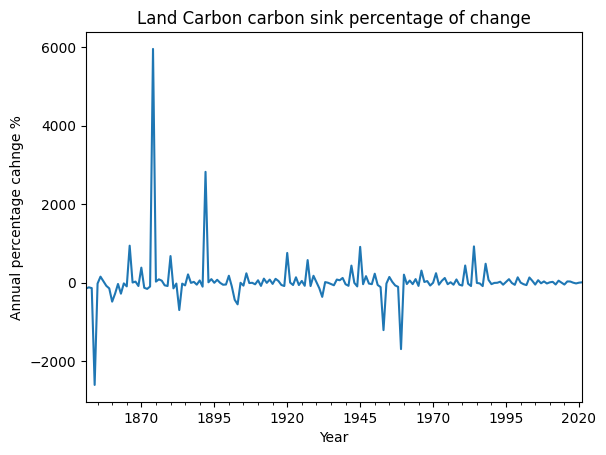

In [ ]:
sink_pct = (GCP.land_sink).pct_change().dropna().mul(100)
sink_pct.plot(title='Land Carbon carbon sink percentage of change', ylabel='Annual percentage cahnge %')
plt.show()

In [ ]:
sink_pct[abs(sink_pct)>500]

Year
1854-01-01   -2600.909967
1866-01-01     944.276476
1874-01-01    5954.168215
1880-01-01     679.936471
1883-01-01    -694.433964
1892-01-01    2824.370554
1903-01-01    -549.343083
1920-01-01     759.320842
1927-01-01     577.623491
1945-01-01     914.387091
1953-01-01   -1205.348192
1959-01-01   -1688.799317
1984-01-01     926.300873
Name: land_sink, dtype: float64

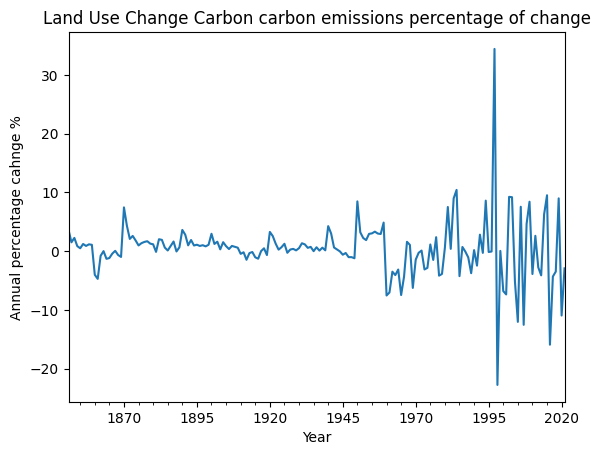

In [ ]:
LUC_pct = (GCP.land_use_change_emission).pct_change().dropna().mul(100)
LUC_pct.plot(title='Land Use Change Carbon carbon emissions percentage of change', ylabel='Annual percentage cahnge %')
plt.show()

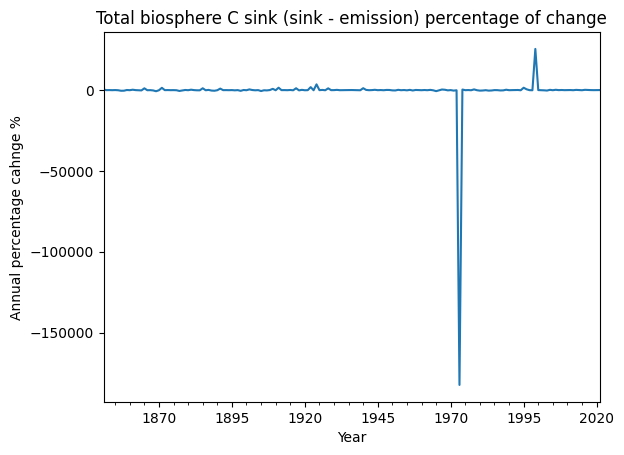

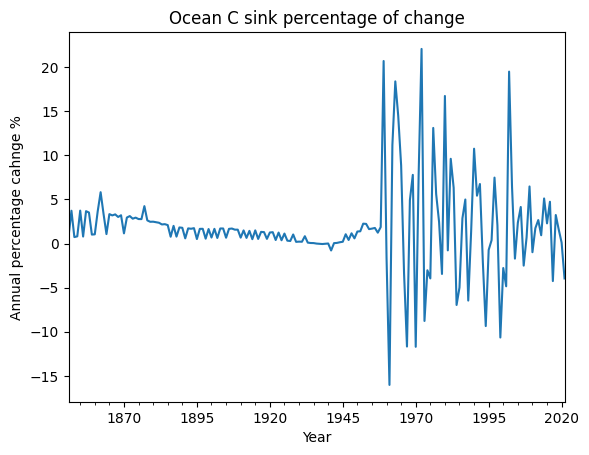

In [ ]:
# Calculate pct change of the sum of sink and LUC
tot_bio_sink_pct = (GCP.land_sink.sub(GCP.land_use_change_emission)).pct_change().dropna().mul(100)
tot_bio_sink_pct.plot(title='Total biosphere C sink (sink - emission) percentage of change', ylabel='Annual percentage cahnge %')
plt.show()

ocean_sink_pct = GCP.ocean_sink.pct_change().dropna().mul(100)
ocean_sink_pct.plot(title='Ocean C sink percentage of change', ylabel='Annual percentage cahnge %')
plt.show()

massive emission can happen due to wildfire but massive sink can not happen on land because terrestrial plants don’t increase exponentially in a short time. Should we think about the role of algal blooms in carbon sinks?

In [ ]:
print("The mean percentage of change of total land (sink - emission) is ",round(tot_bio_sink_pct.mean()),'% yearly')

The mean percentage of change of total land (sink - emission) is  -855 % yearly


In [ ]:
r, p = stats.pearsonr(tot_bio_sink_pct, ocean_sink_pct)
print("correlations value fro R is", round(r,2), 'And for P is',round(p,2))

correlations value fro R is 0.13 And for P is 0.08


I see my reasoning is incorrect because I separated the sink from the natural disequilibrium sink :(

## $\color{blue}{\text{Reject unrealistic changes of land sink, should I?}}$

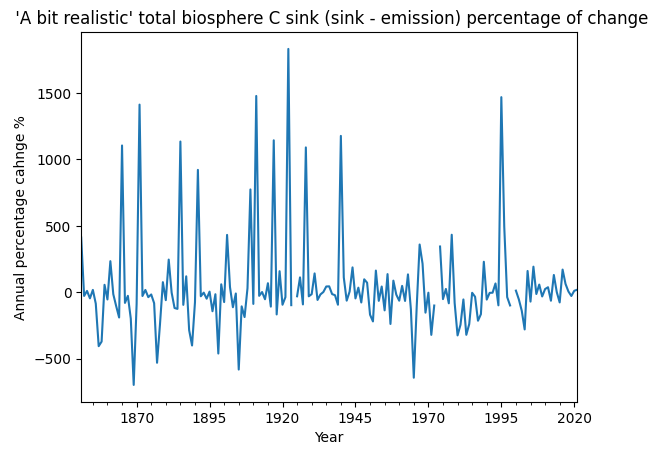

In [ ]:
no_outlier_sink = tot_bio_sink_pct
no_outlier_sink['1973-01-01'] =np.nan
no_outlier_sink['1999-01-01'] =np.nan
no_outlier_sink['1924-01-01'] =np.nan


no_outlier_sink.plot(title=' \'A bit realistic\' total biosphere C sink (sink - emission) percentage of change', ylabel='Annual percentage cahnge %')
plt.show()

In [ ]:
tot_bio_sink_pct['1856']

Year
1856-01-01   -85.929504
dtype: float64

In [ ]:
print("The mean percentage of change of total land (sink - emission) become NOW after deleting the unrealistic values",round(tot_bio_sink_pct.mean()),'% yearly')

The mean percentage of change of total land (sink - emission) become NOW after deleting the unrealistic values -855 % yearly


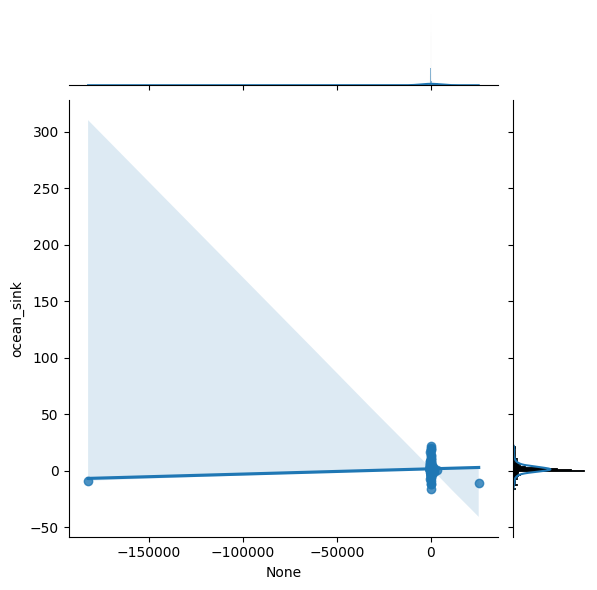

In [ ]:
#check the hist and if there is any correlation
sns.jointplot(x=tot_bio_sink_pct, y=ocean_sink_pct, kind="reg")

## Closing the budget  

In [ ]:
print("The total absolute fluctuations sum of the Budget Imbalance is", round((np.abs(GCP.budget_imbalance)).sum(),2) ,
      "GtC for all the periods from 1850 to 2022. ","\n"
      "The total sum of the Budget Imbalance is", round(GCP.budget_imbalance.sum(),2), "GtC","\n"
      "This extra 13.11 GtC sink affirms the fact of missing sinks from the budget, like the biological pump")

The total absolute fluctuations sum of the Budget Imbalance is 96.61 GtC for all the periods from 1850 to 2022.  
The total sum of the Budget Imbalance is 13.11 GtC 
This extra 13.11 GtC sink affirms the fact of missing sinks from the budget, like the biological pump


The land sink is calculated initially in the GCP as a residual. I added the budget imbalance to the land sink to close the budget

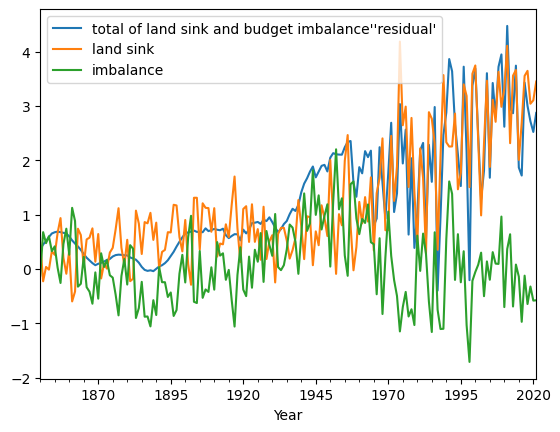

In [ ]:
residual= GCP.land_sink + GCP.budget_imbalance

residual.plot(label="total of land sink and budget imbalance''residual'")
GCP.land_sink.plot(label='land sink')
GCP.budget_imbalance.plot(label='imbalance')
plt.legend()

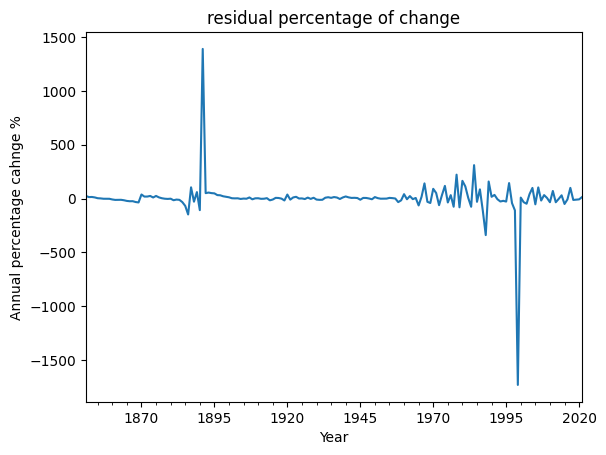

In [ ]:
residual_pct = (residual).pct_change().dropna().mul(100)
residual_pct.plot(title='residual percentage of change', ylabel='Annual percentage cahnge %')
plt.show()

In [ ]:
residual_pct.mean()

3.8387408073643936

In [ ]:
residual_pct['1891-01-01'] =0

In [ ]:
residual_pct['1999-01-01'] =0

In [ ]:
# c =40
# residual_pct[c:(c+20)]

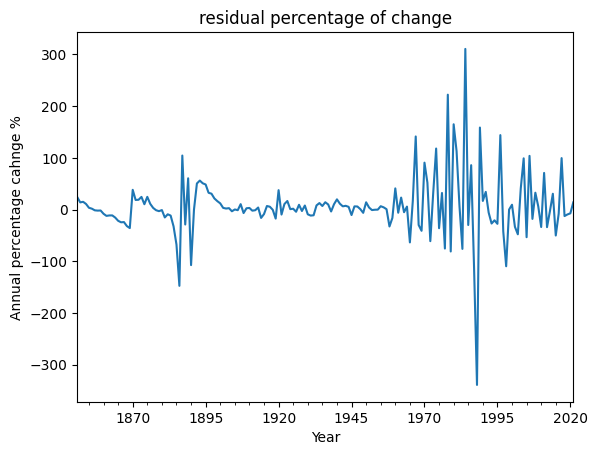

In [ ]:
residual_pct.plot(title='residual percentage of change', ylabel='Annual percentage cahnge %')
plt.show()

In [ ]:
residual_pct.mean()

5.829964044891704

## Biological Carbon Pump **BCP** and other fluxes that end to ocean


 The quantification of Biological Carbon Pump BCP varies widely. The variation in estimation begins with the fluctuations of primary productivity in the Euphotic zone. [Behrenfeld et al. (2006)](https://www.nature.com/articles/nature05317) show a ~4% variation in surface chlorophyll using Remote sensing and the SeaWiFS instrument. The exported C from the sunlit zone to the ocean interior is ~10 GtC/year ([Earth Observatory website](https://earthobservatory.nasa.gov/features/Phytoplankton)). Finally, ~2 GtC/year will be deposited on the ocean floor, where it will degrade. The final **buried** C is estimated to be between **0.2 and 0.4** GtC a year ([Middelburg, 2019](https://link.springer.com/book/10.1007/978-3-030-10822-9)). In the IPCC report that 0.2 GtC is buried ([Canadell et al.,2021](https://www.ipcc.ch/report/ar6/wg1/downloads/report/IPCC_AR6_WGI_Chapter05.pdf), p700). The study by [Buesseler et al. (2020)](https://doi.org/10.1073/pnas.1918114117) thinks that BCP is twice more efficient in carbon sequestration than we thought before.   

The effect of climate change on BCP has yet to be fully understood. The feedbacks on BCP are both positive and negative ([Canadell et al.,2021](https://www.ipcc.ch/report/ar6/wg1/downloads/report/IPCC_AR6_WGI_Chapter05.pdf),  p682). Higher CO2 enhances phytoplankton growth rate ([WOLF-GLADROW et al., 2002](https://doi.org/10.1034/j.1600-0889.1999.00023.x)).   

In this simple model, I will merge the terrestrial rivers' carbon input with the BCP Because both deliver carbon to the ocean. The exported carbon from rivers to oceans varies between **0.35** GtC/year (Raymond & Spencer, 2015) and **0.8** by (Canadell et al.,2021, p700). The rivers signal will affect the model because its δ13C values which vary between −21 to −29‰ ([Qi et al. 2020](https://www.nature.com/articles/s41467-020-18808-8 ))    

Finally, I also considered the marine rain carbon flux. Marine rain washes the dust and dissolves the carbon dioxide from the atmosphere. [Willey et al. (2000)](https://doi.org/10.1029/1999GB900036 ) calculated almost ~0.5 GtC/year of carbon delivered by rain to the surface ocean as DOC or DIC.I will put the minimum expectation at zero GtC/year because this flux is delivered to the ocean's surface; it is vulnerable to degradation and reemitting back to the atmosphere.  

Flux | minimum magnitude GtC/year| Maximum magnitude GtC/year
----- | --------| ------
Biological pump |0.2 | 0.8
Rivers' carbon |0.35 | 0.8
 Rain |0 | 0.5
  |-------------- |--------------
Total |0.55|  2.1

GCP considers all residuals as a Land Sink. However, I will take part of this residual flux and assign it to the ocean biological pump. So the assigned portion of carbon will flow into the ocean surface instead of the biosphere. The factor will be between 0 and 1 of the GCP Land_sink flux. I will call this factor "biological_pump_percentage." In the following code line, I will plot it to see if it is near the expected flux magnitude.

In [ ]:
biological_pump_percentage = 0  # instead of 0.2
# However, I will take part of this residual flux and assign it to the ocean biological pump

# biological_pump = residual* biological_pump_percentage
Land_sink_nettto = residual * (1- biological_pump_percentage)
# biological_pump.plot(label='biological pump according to this model', color='black')

## Mummified Carbon flux
After that, the "Land_sink_nettto" flux ends up in land. Part of this carbon is mummified for a very long time.  
`Here I suggest a new principle of "Carbon mummification".` Carbon is mummified due to pollutions, contamination, anoxia, or becoming chemical compounds with very long degradation time like charcol, or rapid environmental change that kill the organisms massively, or other Carbon mummification process.  

Waste dumping on land or ocean and plastic packaging that prevents carbon from escaping are examples of the Carbon mummification process. The waste dumping practice considered as part of this Carbon Mummified reservoir because Carbon will not have enough time to fully decay due to high accumulation of waste-dump or even from algal bloom.  

This flux will be subtracted from the **biosphere reservoir**. The magnitude of the mummified_C_flux will also be **as** fraction of the Land_sink_nettto   
It's **not** subtracted from the land sink, it's proportional to the land sink.  
In the subsequent code lines, I will code the percentage of this Mummified Carbon flux, plot it, and then explain and try to quantify its contents fluxes, namely the:  
1. Black Carbon


#### **1. Black Carbon**   
Black carbon BC, also called Carbonaceous particles or soot or pyrogenic carbon, are mixtures  of fine particles of the incomplete combustion of fossil fuel. BC floats in the air after combustion then deposits or washed onto the land or ocean. Rainwater washes the BC and other organic compounds to the surface water and ocean. Black Carbon BC mainly originated from wildfires and burning biomass.BC has residence time of 5,387 years ([Bowring et al. 2022](https://www.nature.com/articles/s41561-021-00892-0)), hence, BC will disappear from Carbon Cycle in short term.

The magnitude of the flux has high uncertainty:  
* [Jones et al. (2019)]( https://www.nature.com/articles/s41561-019-0403-x) reported almost a ~third Giga ton of Black Carbon a year. They estimated 60 GtC accumulated since 1750 from landscape fires. In their words “Our central estimate equates to **12% of the annual carbon emitted globally by landscape fires.  
~33–40% of the global biomass carbon (60 Pg) lost through land use change  since 1750**”.  
* whereas [Xu et al., (2011)](https://doi.org/10.1021/acs.est.1c03117) reported just 0.01 GtC/year.Thirty times smaller than the previous estimation of Jones et al. (2019).  
* [Qi et al. (2020)](https://www.nature.com/articles/s41467-020-18808-8 ) estimated the BC from biomass burning ~(0.114–0.383 GtC/year) but they estimated very small flux of BC from fossil fuel combustion (0.002–0.029 GtC/year)   
* ([Bowring et al. 2022](https://www.nature.com/articles/s41561-021-00892-0)) calculation was an average of 0.34 GtC/year from Wildfires in the periode from 1901 to 2010.   


BC and other pollutions can affect our model because it takes the depleted d13C atoms from the box-model so I need to test it. beside the isotopic balance issue. The BC and burned charcol can be stored in ocean and soil for for centuries to millennia ([Qi et al. 2020](https://www.nature.com/articles/s41467-020-18808-8)). Because these long turning over time, BC disappears from the active system. [Jones et al. (2019)]( https://www.nature.com/articles/s41561-019-0403-x) pointed out that Global Carbon Project GCP misses the Pyrogenic carbon flux which results in calculation errors in the budget.

#### **Other Carbon fluxes quantification**  

1. Black carbon from Incomplete burning (Even the wildfire has this). so it has two sources (fossil fuels and land use change).  

2. washing of organic matter from atmosphere to the ocean and land
3. Urban Sewage and waste   
4. Agriculture waste, food waste, Woodworking, ash, animal waste (liquid and solid)  
5. Enhancement of food storage with freezing, drying, oxygen free packaging, salting, and silos.    
6. Chemicals effect on decay time (pesticides, herbicides, fungicides,antibiotics, and plastic) and expanding of marine anoxia zones. These effect mostly the bacteria & archaea reservoir but also the vegetation(≈77 Gt C)
7. River organic matter flux to the ocean  
8. Weathering flux  
9. inert biological polymers produced by plants and animals like Sporopollenin of pllen

### Petrochemical
In the following lines, I will estimate the Petrochemical fluxes and then try to check if they can affect the model.   
  
Not all the reported fossil fuel is burned into the atmosphere. Many products are made from fossil fuel but end up not-burned in other places.  Take for example the leakages during transfer and usage of a car diesel leak or ship tanker washing. Most importants are the Petrochemical Feedstocks. Fossil fuels are incorporated **in** many Petrochemical Feedstocks like fertilizer, rubber, clothes, fabrics, asphalt, and various plastics. Most petrochemicals like plastics or asphalt remain in the environment and are not burnt. [IEA (2018)](https://www.iea.org/reports/the-future-of-petrochemicals) estimates that **14% of oil** and **8% of gas** used in Petrochemical Feedstocks. Removing non-combusted fossil fuel from the budget will affect mainly the oil becasue it's the most used in petrochemical industry ([Andrew, 2020,](https://doi.org/10.5194/essd-12-1437-2020) P6).    


GCP fossil fuel dataset based on the Carbon Dioxide Information Analysis Center CDIAC. Emission factors are used to calculate the emissions and discriminate the non-combusted fossil. Emission factors are applied to coal and natural gas ([Andrew, 2020](https://doi.org/10.5194/essd-12-1437-2020)). "*The fossil CO2 dataset accounts for some share of carbon that is not oxidized. Nevertheless, GCP does not calculate explicitly how much of this is black carbon or petrochemical*" (personal communication with Dr. Robbie Andrew, 2023).  
Because "*True*  emissions  cannot  be  known" according to Andrew ([2020](https://doi.org/10.5194/essd-12-1437-2020)), In the following code line, I test to subtract [IEA](https://www.iea.org/reports/the-future-of-petrochemicals) estimation of Petrochemical usage of oil and gas. This test its possibility influence on the model.    

## 2- Importing [Scrippsco2](https://scrippsco2.ucsd.edu/data/atmospheric_co2/sampling_stations.html) data

In [ ]:
# importing the d13C south pole measurments from Scrippsco2 project
url_south_pole_13C= 'https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/flask_isotopic/monthly/monthly_flask_c13_spo.csv'
# let us import the columns (3,5,8)
# Column 3 gives the date in excel format
# the data is on every 15th of each month
# Column 5 gives monthly isotope concentrations in per-mil
# Column 8 is the same smoothed version with the seasonal cycle removed
south_pole_13C = pd.read_csv(url_south_pole_13C, skiprows=60, usecols=[2,4,7])

south_pole_13C.columns=['SPO_date', 'SPO_d13C_monthly', 'SPO_d13C_without_Seasonality']
# Convert the excel date tp python format
south_pole_13C['SPO_date'] = pd.to_datetime(south_pole_13C['SPO_date'], unit='d', origin='1899-12-30')

# convert the data to float BEFORE setting the index, otherwise the dropna function will not work
south_pole_13C['SPO_d13C_monthly'] = south_pole_13C['SPO_d13C_monthly'].astype(float)

south_pole_13C.set_index('SPO_date', inplace =True, drop=True)
south_pole_13C.dropna(inplace = True)

#south_pole_13C.info()  # assure that no more NA data and the length is 507
#south_pole_13C.plot(subplots=True)

In [ ]:
# importing the CO2 south pole measurments from Scrippsco2 project
url_south_pole_CO2= 'https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/merged_in_situ_and_flask/monthly/monthly_merge_co2_spo.csv'
south_pole_CO2 = pd.read_csv(url_south_pole_CO2, skiprows=58, usecols=[2,4,7])

south_pole_CO2.columns = ['south_pole_CO2_date', 'south_pole_CO2_monthly', 'south_pole_CO2_without_Seasonality']
south_pole_CO2.iloc[:,0] = pd.to_datetime(south_pole_CO2.iloc[:,0], unit='d', origin='1899-12-30')
south_pole_CO2['south_pole_CO2_monthly'] = south_pole_CO2['south_pole_CO2_monthly'].astype(float)
south_pole_CO2.set_index('south_pole_CO2_date', inplace =True, drop=True)
south_pole_CO2.dropna(inplace = True)

# Constructing the atmosphere Crabon pool size using the CO2 measurements of Scrippsco2
south_pole_CO2['Atmospheric_C_pool_scrippsco2_GtC_without_Seasonality']= (5.1352*12.011*south_pole_CO2.south_pole_CO2_without_Seasonality)/(28.96546 + 0.000012011 * (south_pole_CO2.south_pole_CO2_without_Seasonality - 400))
south_pole_CO2['Atmospheric_C_pool_scrippsco2_GtC_monthly']= (5.1352*12.011*south_pole_CO2.south_pole_CO2_monthly)/(28.96546 + 0.000012011 * (south_pole_CO2.south_pole_CO2_monthly - 400))

#south_pole_CO2.plot(subplots=True)
#south_pole_CO2.info()
#south_pole_CO2  # assure that no more NA data

In [ ]:
# importing the Barrow_Alaska measurments from Scrippsco2 project
url_ptb_13C= 'https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/flask_isotopic/monthly/monthly_flask_c13_ptb.csv'
ptb_13C = pd.read_csv(url_ptb_13C, skiprows=60, usecols=[2,4,7])
ptb_13C.columns = ['ptb_date', 'ptb_d13C_monthly', 'ptb_d13C_without_Seasonality']
ptb_13C['ptb_date'] = pd.to_datetime(ptb_13C['ptb_date'], unit='d', origin='1899-12-30')
ptb_13C['ptb_d13C_monthly'] = ptb_13C['ptb_d13C_monthly'].astype(float)
ptb_13C.set_index('ptb_date', inplace =True, drop=True)
ptb_13C.dropna(inplace = True)
#ptb_13C.plot()
#ptb_13C  # assure that no more NA data

In [ ]:
# importing the CO2 Barrow, Alaska measurments from Scrippsco2 project
url_Ptb_CO2= 'https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/merged_in_situ_and_flask/monthly/monthly_merge_co2_ptb.csv'
ptb_CO2 = pd.read_csv(url_Ptb_CO2, skiprows=58, usecols=[2,4,7])

ptb_CO2.columns = ['ptb_CO2_date', 'ptb_CO2_monthly', 'ptb_CO2_without_Seasonality']
ptb_CO2['ptb_CO2_date'] = pd.to_datetime(ptb_CO2['ptb_CO2_date'], unit='d', origin='1899-12-30')
ptb_CO2['ptb_CO2_monthly'] = ptb_CO2['ptb_CO2_monthly'].astype(float)
ptb_CO2.set_index('ptb_CO2_date', inplace =True, drop=True)
ptb_CO2.dropna(inplace = True)

# Constructing the atmosphere Crabon pool size using the CO2 measurements of Scrippsco2
ptb_CO2['Atmospheric_C_pool_scrippsco2_GtC_without_Seasonality']= (5.1352*12.011*ptb_CO2.ptb_CO2_without_Seasonality)/(28.96546 + 0.000012011 * (ptb_CO2.ptb_CO2_without_Seasonality - 400))
ptb_CO2['Atmospheric_C_pool_scrippsco2_GtC_monthly']= (5.1352*12.011*ptb_CO2.ptb_CO2_monthly)/(28.96546 + 0.000012011 * (ptb_CO2.ptb_CO2_monthly - 400))

#ptb_CO2.plot(subplots=True)
#ptb_CO2.info()
#ptb_CO2  # assure that no more NA data

In [ ]:
ptb_CO2.ptb_CO2_without_Seasonality['1990'].mean()

356.5216666666667

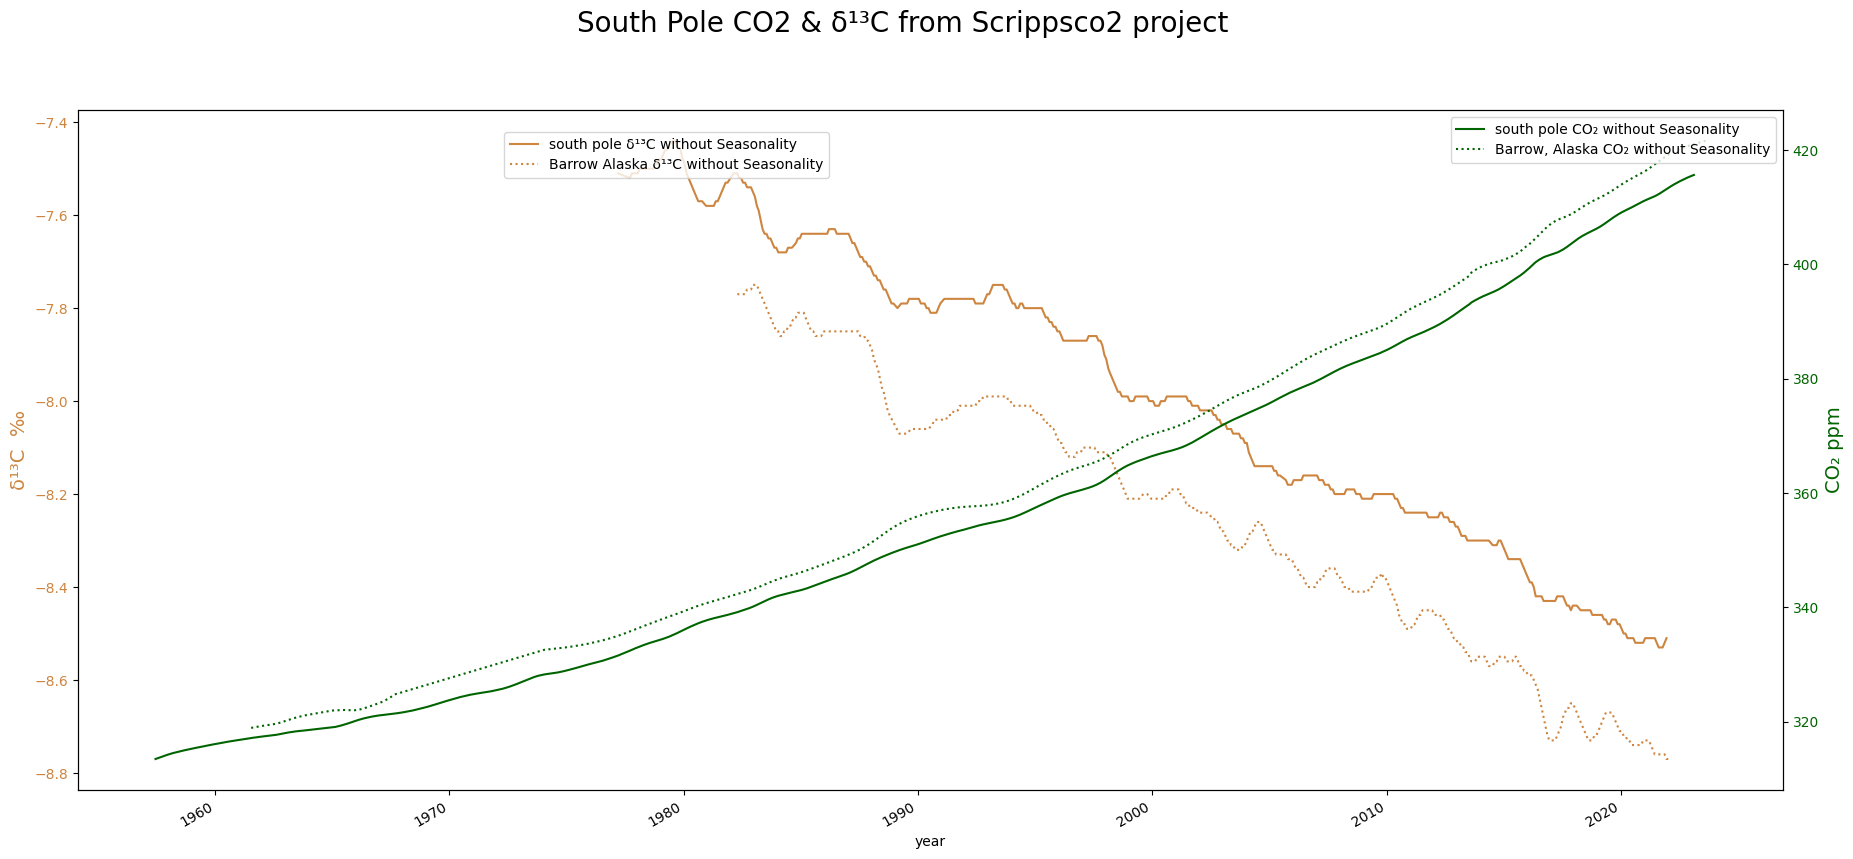

In [ ]:
# visualize d13C and CO2 imported data in ONE plots
fig, ax1 = plt.subplots(figsize=(22, 10))
ax2 = ax1.twinx()

ax1.plot(south_pole_13C.index, south_pole_13C.SPO_d13C_without_Seasonality, label='south pole δ¹³C without Seasonality', color='peru')
ax1.plot(ptb_13C.index, ptb_13C.ptb_d13C_without_Seasonality, label='Barrow Alaska δ¹³C without Seasonality', color='peru', linestyle = ':')
ax2.plot(south_pole_CO2.index, south_pole_CO2.south_pole_CO2_without_Seasonality, label='south pole CO\u2082 without Seasonality', color='darkgreen')
ax2.plot(ptb_CO2.index, ptb_CO2.ptb_CO2_without_Seasonality, label='Barrow, Alaska CO\u2082 without Seasonality', color='darkgreen', linestyle = ':')

ax1.legend(loc=(0.25,0.9))
ax2.legend(loc="upper right")

ax1.set_xlabel("year")
ax1.set_ylabel("δ¹³C  ‰", color='peru', fontsize=14)
ax1.tick_params(axis="y", labelcolor='peru')

ax2.set_ylabel("CO₂ ppm", color='darkgreen', fontsize=14)
ax2.tick_params(axis="y", labelcolor='darkgreen')

fig.suptitle("South Pole CO2 & δ¹³C from Scrippsco2 project", fontsize=20)
#fig.tight_layout()
fig.autofmt_xdate()

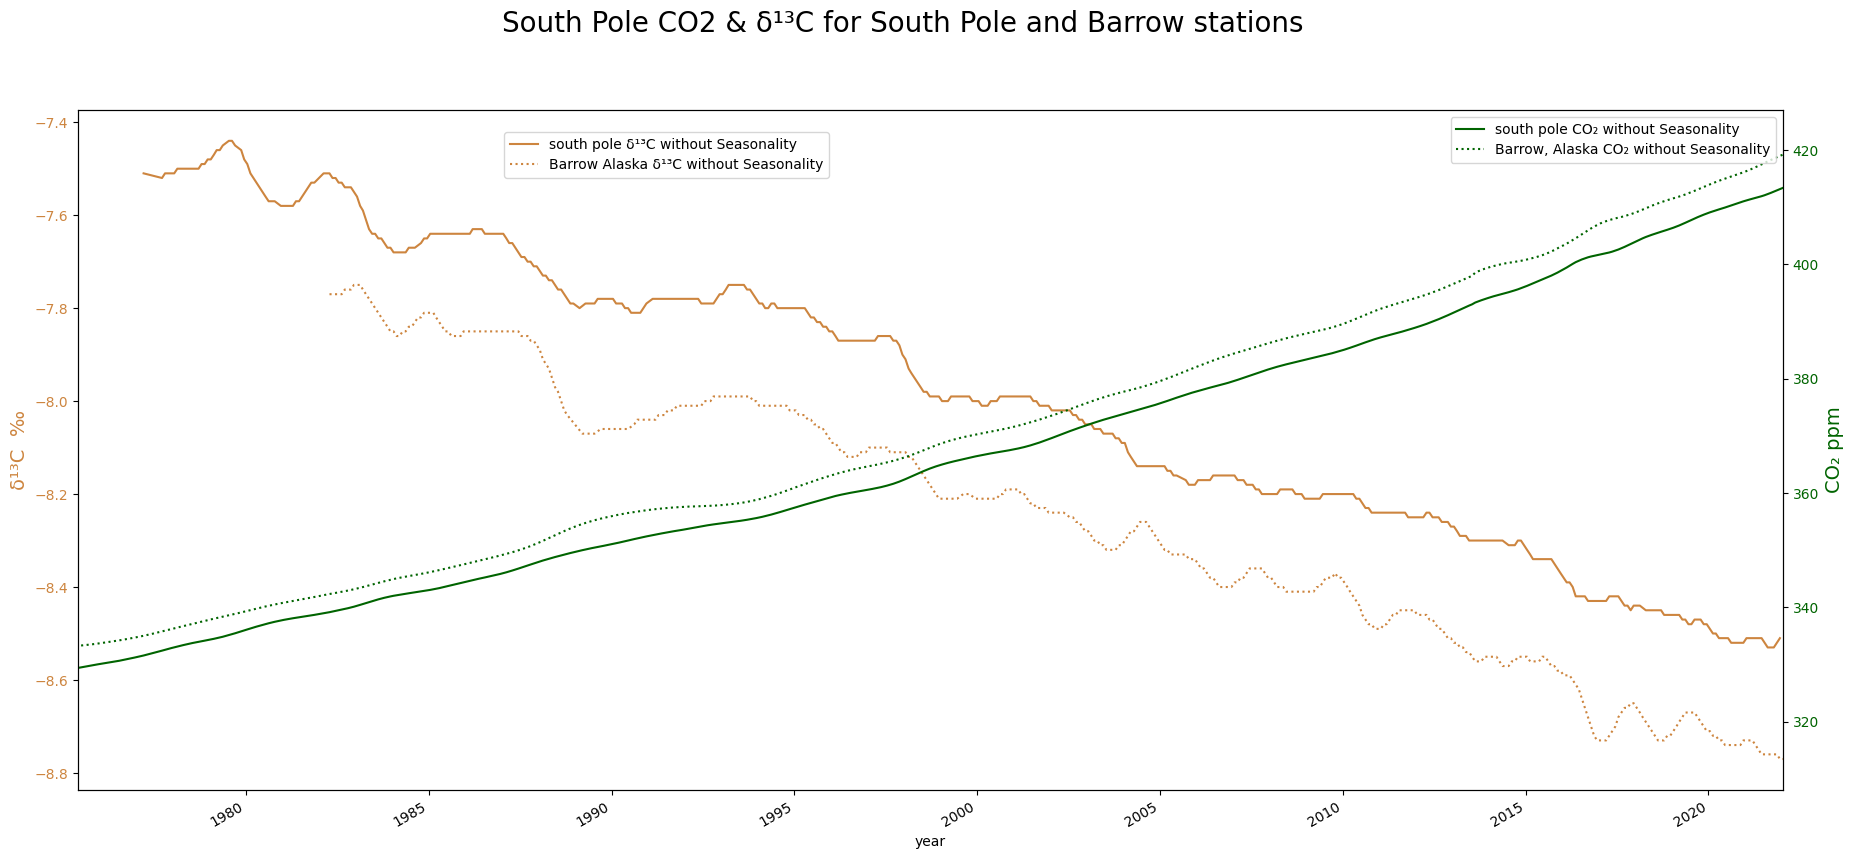

In [ ]:
# visualize d13C and CO2 imported data in ONE plots
fig, ax1 = plt.subplots(figsize=(22, 10))
ax2 = ax1.twinx()

ax1.plot(south_pole_13C.index, south_pole_13C.SPO_d13C_without_Seasonality, label='south pole δ¹³C without Seasonality', color='peru')
ax1.plot(ptb_13C.index, ptb_13C.ptb_d13C_without_Seasonality, label='Barrow Alaska δ¹³C without Seasonality', color='peru', linestyle = ':')
ax2.plot(south_pole_CO2.index, south_pole_CO2.south_pole_CO2_without_Seasonality, label='south pole CO\u2082 without Seasonality', color='darkgreen')
ax2.plot(ptb_CO2.index, ptb_CO2.ptb_CO2_without_Seasonality, label='Barrow, Alaska CO\u2082 without Seasonality', color='darkgreen', linestyle = ':')

ax1.legend(loc=(0.25,0.9))
ax2.legend(loc="upper right")

ax1.set_xlabel("year")
ax1.set_ylabel("δ¹³C  ‰", color='peru', fontsize=14)
ax1.tick_params(axis="y", labelcolor='peru')

ax2.set_ylabel("CO₂ ppm", color='darkgreen', fontsize=14)
ax2.tick_params(axis="y", labelcolor='darkgreen')

fig.suptitle("South Pole CO2 & δ¹³C for South Pole and Barrow stations", fontsize=20)
ax1.set_xlim(1975, max(max(south_pole_13C.index), max(ptb_13C.index)))
fig.autofmt_xdate()


In [ ]:
ptb_CO2.ptb_CO2_without_Seasonality['1995-7-15']

362.11

In [ ]:
south_pole_CO2.south_pole_CO2_without_Seasonality['1995-7-15']

358.42

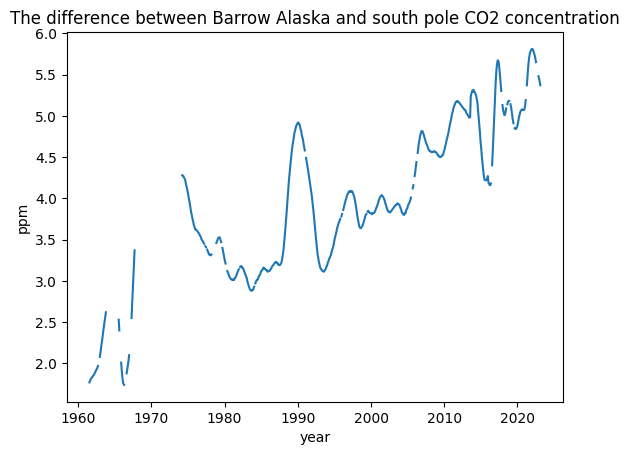

In [ ]:
plt.plot(ptb_CO2.ptb_CO2_without_Seasonality-south_pole_CO2.south_pole_CO2_without_Seasonality)
plt.title("The difference between Barrow Alaska and south pole CO2 concentration")
plt.ylabel('ppm')
plt.xlabel('year')
plt.show()

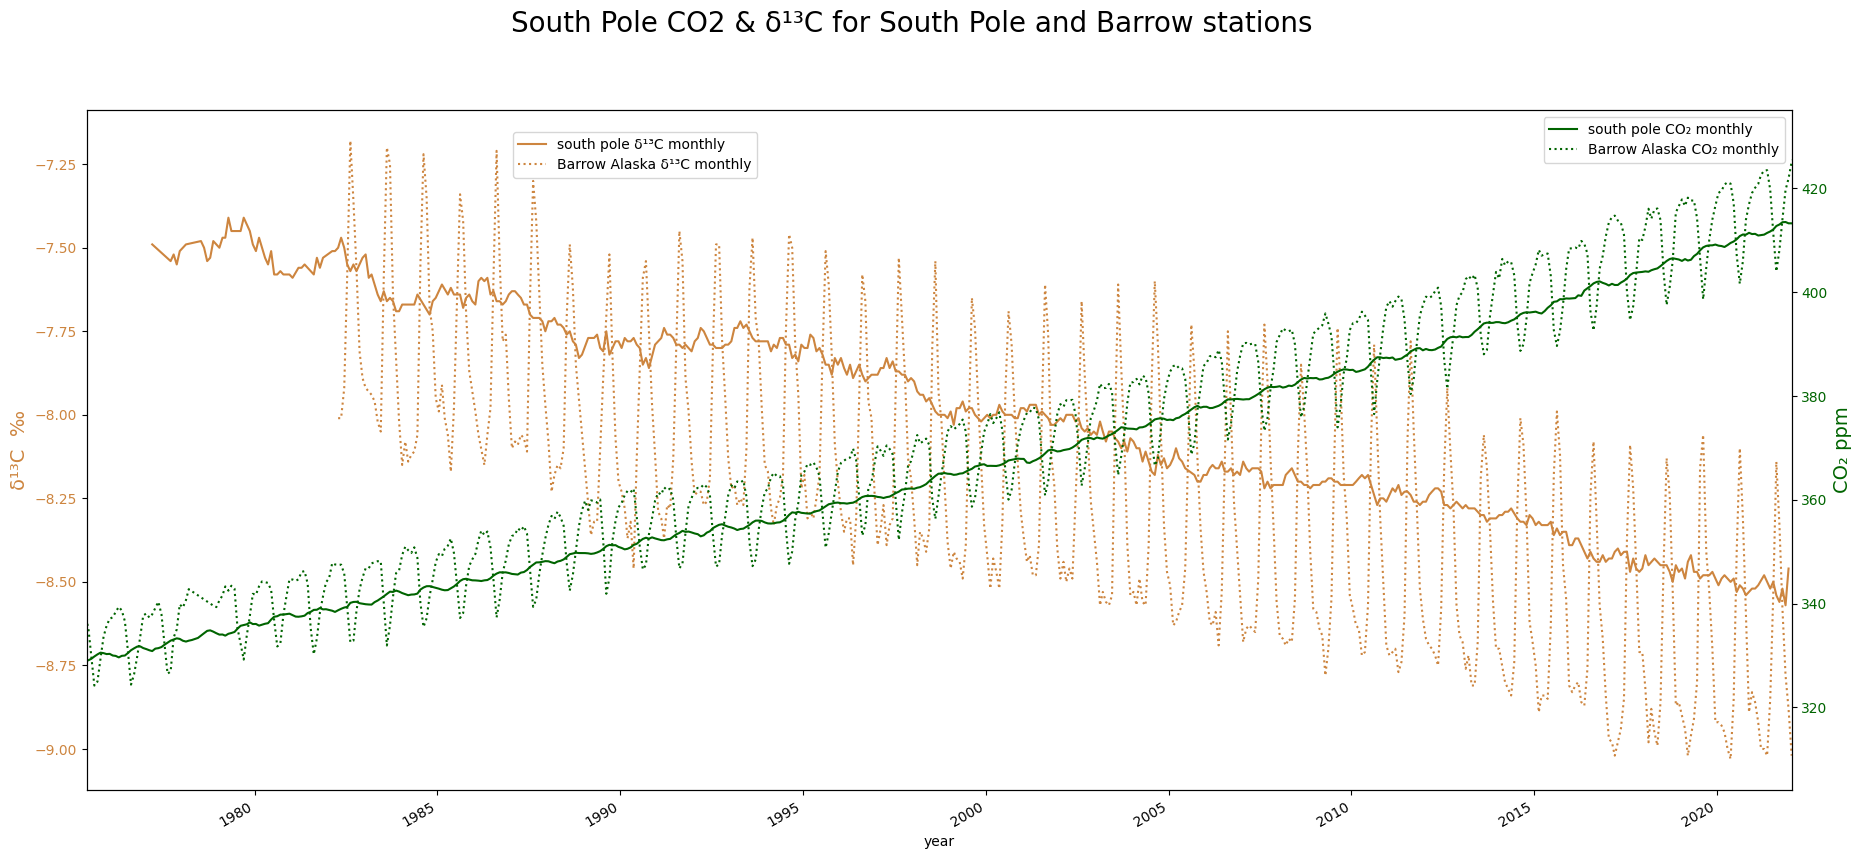

In [ ]:
# visualize d13C and CO2 imported data in ONE plots
fig, ax1 = plt.subplots(figsize=(22, 10))
ax2 = ax1.twinx()

ax1.plot(south_pole_13C.index, south_pole_13C.SPO_d13C_monthly, label='south pole δ¹³C monthly', color='peru')
ax1.plot(ptb_13C.index, ptb_13C.ptb_d13C_monthly, label='Barrow Alaska δ¹³C monthly', color='peru', linestyle = ':')
ax2.plot(south_pole_CO2.index, south_pole_CO2.south_pole_CO2_monthly, label='south pole CO\u2082 monthly', color='darkgreen')
ax2.plot(ptb_CO2.index, ptb_CO2.ptb_CO2_monthly, label='Barrow Alaska CO\u2082 monthly', color='darkgreen', linestyle = ':')

ax1.legend(loc=(0.25,0.9))
ax2.legend(loc="upper right")

ax1.set_xlabel("year")
ax1.set_ylabel("δ¹³C  ‰", color='peru', fontsize=14)
ax1.tick_params(axis="y", labelcolor='peru')

ax2.set_ylabel("CO₂ ppm", color='darkgreen', fontsize=14)
ax2.tick_params(axis="y", labelcolor='darkgreen')

ax1.set_xlim(1975, max(max(south_pole_13C.index), max(ptb_13C.index)))
fig.suptitle("South Pole CO2 & δ¹³C for South Pole and Barrow stations", fontsize=20)
#fig.tight_layout()
fig.autofmt_xdate()

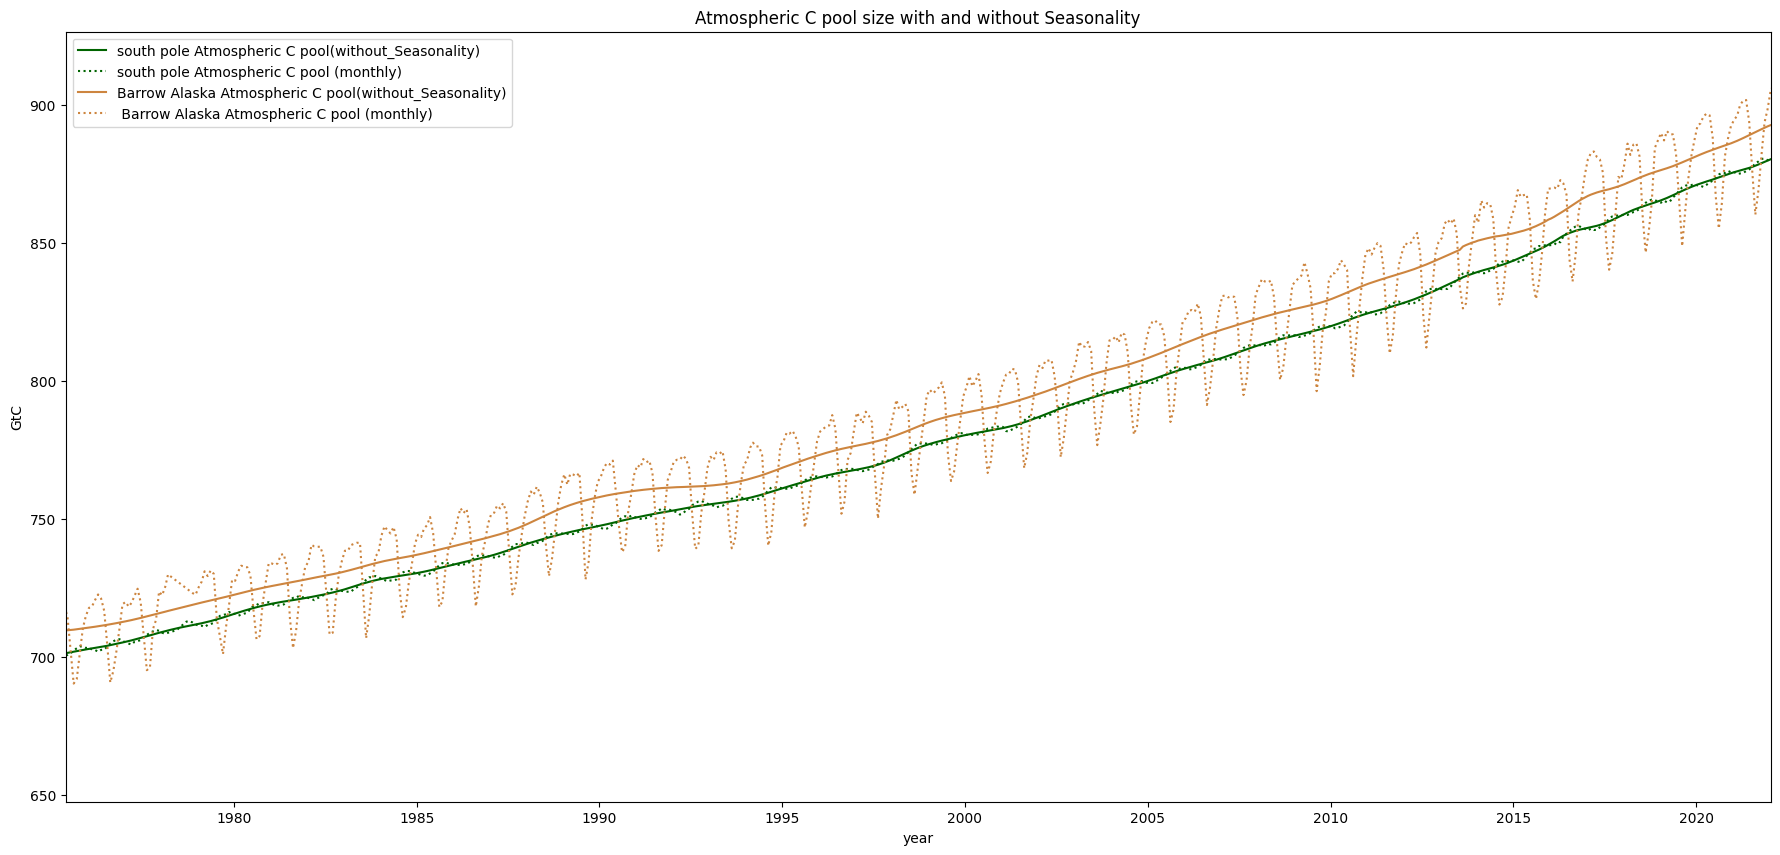

In [ ]:
# visualize the Atmospheric C pool size according to scrippsco2
plt.figure(figsize=(22, 10))
plt.plot(south_pole_CO2.Atmospheric_C_pool_scrippsco2_GtC_without_Seasonality,label='south pole Atmospheric C pool(without_Seasonality)',color='darkgreen')
plt.plot(south_pole_CO2.Atmospheric_C_pool_scrippsco2_GtC_monthly, label='south pole Atmospheric C pool (monthly)', color='darkgreen',linestyle = ':')

plt.plot(ptb_CO2.Atmospheric_C_pool_scrippsco2_GtC_without_Seasonality,label='Barrow Alaska Atmospheric C pool(without_Seasonality)',color='peru')
plt.plot(ptb_CO2.Atmospheric_C_pool_scrippsco2_GtC_monthly, label=' Barrow Alaska Atmospheric C pool (monthly)', color='peru',linestyle = ':')

plt.xlabel('year')
plt.ylabel('GtC')
plt.title("Atmospheric C pool size with and without Seasonality")
plt.xlim(1972, max(max(south_pole_13C.index), max(ptb_13C.index)))
plt.legend()
plt.show()

In [ ]:
ptb_CO2.Atmospheric_C_pool_scrippsco2_GtC_without_Seasonality['1995-7-15']

771.0871073084752

In [ ]:
south_pole_CO2.Atmospheric_C_pool_scrippsco2_GtC_without_Seasonality['1995-7-15']

763.2306865105471

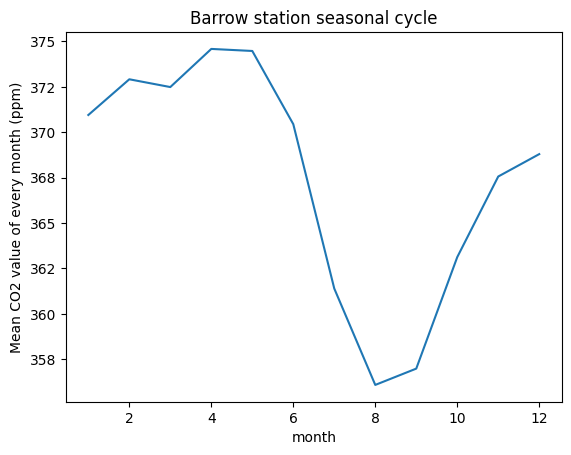

In [ ]:
index_month = ptb_CO2.index.month
ptb_CO2_by_month = ptb_CO2.ptb_CO2_monthly.groupby(index_month).mean()
ptb_CO2_by_month.plot()

plt.xlabel('month')
plt.ylabel('Mean CO2 value of every month (ppm)')
plt.gca().yaxis.set_major_formatter('{:.0f}'.format)
plt.title("Barrow station seasonal cycle")
plt.show()

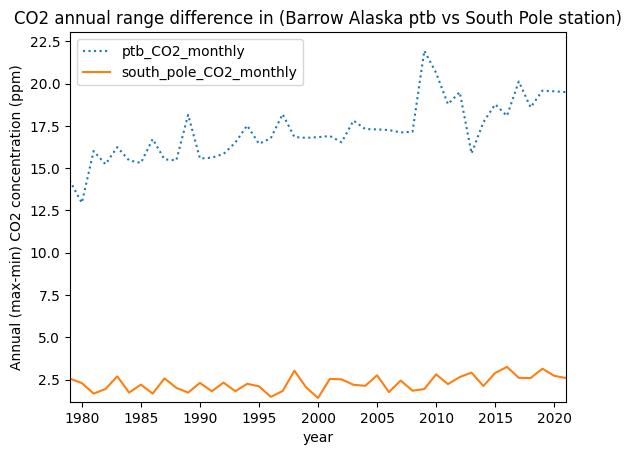

In [ ]:
ptb_CO2_groupby_year = ptb_CO2.ptb_CO2_monthly.groupby(ptb_CO2.index.year)
ptb_year_fluctuation= ptb_CO2_groupby_year.max() -ptb_CO2_groupby_year.min()
ptb_year_fluctuation.plot(style=':')

south_pole_CO2_groupby_year =   south_pole_CO2.south_pole_CO2_monthly.groupby(south_pole_CO2.index.year)
south_pole_year_fluctuation = south_pole_CO2_groupby_year.max() -south_pole_CO2_groupby_year.min()
south_pole_year_fluctuation.plot()
plt.xlim(1979, 2021)
plt.ylim(1.2)
plt.xlabel('year')
plt.ylabel('Annual (max-min) CO2 concentration (ppm)')
plt.legend()
plt.title("CO2 annual range difference in (Barrow Alaska ptb vs South Pole station)")
plt.show()
# echo=False

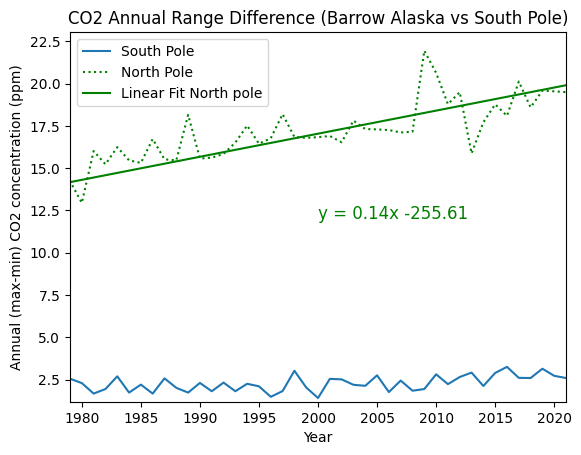

In [ ]:
# Calculate linear fit line
x_values = ptb_year_fluctuation.index.values[-50:]
y_values = ptb_year_fluctuation.values[-50:]
coefficients = np.polyfit(x_values, y_values, 1)
linear_fit = np.polyval(coefficients, x_values)

south_pole_year_fluctuation.plot(label='South Pole')

# Plot data and linear fit line
ptb_year_fluctuation.plot(style=':', label='North Pole', color='green')
plt.plot(x_values, linear_fit, label='Linear Fit North pole', color='green')

# Set limits, labels, legend, and title
plt.xlim(1979, 2021)
plt.ylim(1.2)
plt.xlabel('Year')
plt.ylabel('Annual (max-min) CO2 concentration (ppm)')
plt.legend()
plt.title("CO2 Annual Range Difference (Barrow Alaska vs South Pole)")

# Plot equation of the linear fit line
equation = f'y = {coefficients[0]:.2f}x {coefficients[1]:.2f}'
plt.text(2000, 12, equation, fontsize=12, color='green')

# Show plot
plt.show()

In [ ]:
x_values[-50:]

array([1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2020, 2021, 2022, 2023])

In [ ]:
coefficients

array([ 1.57350311e-01, -2.97763191e+02])

<Axes: xlabel='ptb_CO2_date'>

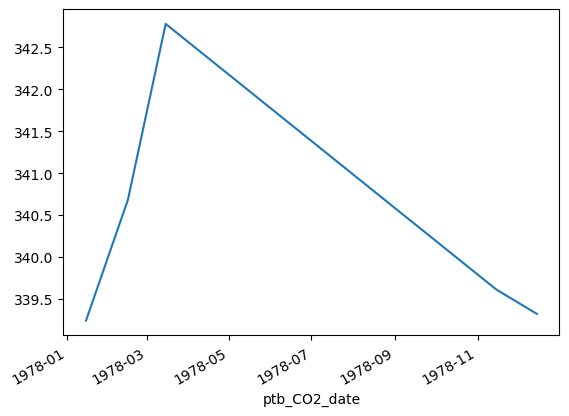

In [ ]:
ptb_CO2.ptb_CO2_monthly['1978'].plot()

##The correlation between the total C sink and the difference between North and south pole measurements

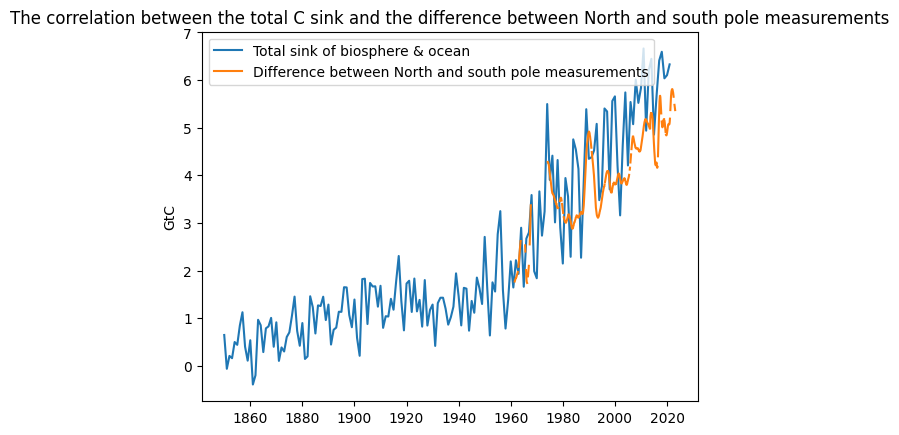

In [ ]:
# plot total sink and the difference between North and south pole measurements
total_C_sink = GCP.land_sink+ GCP.ocean_sink
North_min_south_pole_c_pool= ptb_CO2.ptb_CO2_without_Seasonality-south_pole_CO2.south_pole_CO2_without_Seasonality

plt.plot(total_C_sink, label="Total sink of biosphere & ocean")
plt.plot(North_min_south_pole_c_pool, label='Difference between North and south pole measurements')
plt.title("The correlation between the total C sink and the difference between North and south pole measurements")
plt.ylabel('GtC')

plt.legend()
plt.show()

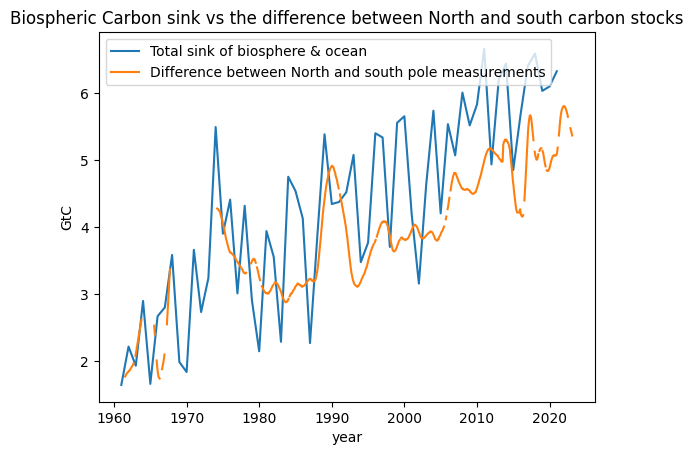

In [ ]:
# zoom in
plt.plot(total_C_sink['1961-01-01':], label="Total sink of biosphere & ocean")
plt.plot(North_min_south_pole_c_pool, label='Difference between North and south pole measurements')
plt.title("Biospheric Carbon sink vs the difference between North and south carbon stocks")
plt.ylabel('GtC')
plt.xlabel('year')
plt.legend()
plt.show()

In [ ]:
import pandas as pd

# Resample North_min_south_pole_c_pool to annual frequency by summing the monthly values
North_min_south_pole_c_pool_annual = North_min_south_pole_c_pool.resample('A').mean()

# Get the last 40 values from both time series
total_C_sink_last_42 = total_C_sink[-42:].reset_index(drop=True)
North_min_south_pole_c_pool_last_42 = North_min_south_pole_c_pool_annual[-44:-2].reset_index(drop=True)


# Calculate Pearson correlation coefficient
correlation = total_C_sink_last_42.corr(North_min_south_pole_c_pool_last_42)

print("Pearson correlation coefficient for the last 40 values:", correlation)


Pearson correlation coefficient for the last 40 values: 0.7650479728809573


## Discussion about biosphere size & biosphere accelerated sink

The biosphere absorbs ~29**±8**% of our **ANNUAL** emission  **during the last decade** according to [Keeling & Graven; 2021](https://doi.org/10.1146/annurev-environ-012220-125406 )

However, the biosphere figure above, shows that this CO2 sink is just a restoration of the original reservoir size. We almost reached the 1850 reservoir capacity. Do we have any extra **capacity**? Can the biosphere accommodate more carbon without amplification of the wildfire risk? In the next lines I will try to answer this question in fast calculation


In [ ]:
#greening= round(biosphere[-1]- biosphere.min())
#greening_percentage = round((greening/biosphere.min())*100)

#print('The total NETTO greening of',np.where(biosphere== biosphere[-1])[0]-np.where(biosphere== biosphere.min())[0] ,'years\
#, from the seventies till today is',greening,'GtC,\
# This is a', greening_percentage, '% increase in capacity' )

**16%** increase in vegetation in the last 50 years according to the model must be an alarming issue for the model and the biosphere capacity. Suppose that the forest area is a third of the world's area; that will be an extra ≈1.5 kilos of carbon in every single square meter of the forest.   
For the sake of calculation simplification: assume that the vegetation is a carbohydrate molecule CH2O with 90% water. In other words:   
For every mole of carbon there will be one H2O then there will be 90% water.   
So for the 1.5 kilos of Carbon we calculated above there will be 2.25 kilos of H2O and (1.5+2.25) x 9  water  
That will make the extra greens vegetation ~37 kilos  in every single square meter of the forest which is unrealistic.


The vegetation **mass** increases in the model don't agree with other measurements and bookkeeping records in the short past or older past. The [FAO](https://data.worldbank.org/indicator/AG.LND.FRST.ZS ) data shows a decrease of 3.3% in the Forest **area** in the last thirty years.  

[Hannah Ritchie and Max Roser (2021)](https://ourworldindata.org/forests-and-deforestation) indicate that The forest **area** was 22% bigger in 1850 than today. The Carbon Budget paper and this model are the same, which is anti-intuitive. So I would expect a 22%  decrease in vegetation reservoir.  

There is high uncertainty in the biosphere carbon sink. For example, TRENDY considers CO2 fertilization to account for ~70% of the Greening ([Piao et al., 2020](https://www.nature.com/articles/s43017-019-0001-x )), whereas [Chen et al. (2019)](https://www.nature.com/articles/s41893-019-0220-7 ) consider human land-use management responsible for more than a third of the greening. The uncertainty in the latest two examples explains the high uncertainty estimation of ±100%, according to [Keeling & Graven's (2021)](https://doi.org/10.1146/annurev-environ-012220-125406)

my reasoning: Biosphere is not only the vegetation. The soil is an essential part of the biosphere. [McGuire et al. (2001)](https://pubs.er.usgs.gov/publication/70073959) modeled an increase in biospheric carbon sink. The soil and organic Carbon reservoir are missing in my model-system. 63 GtC **NETTO** of vegetation growth in 56 years is impossible. The vegetation is growing slowly in reality and maybe decrease. The carbon is stored as organic carbon and leaked to the ocean, groundwater, and soil as an organic compound that stays there for a long time, especially if it is highly diluted, like sewage ending in the ocean. High dilution prevents organic matter decay because it minimizes the chance of meeting organisms to cause its decay.  

It is fundamental to account other fluxes like the livestock waste flux in the model because this waste is mostly washed to ocean/groundwater or in the best scenario added to the soil. When it is washed into the ocean then the decay will take a very long time if the mixing is fast. When it turns to soil it will decay relatively faster. Our livestock (as C reservoir) is now ~15 times bigger than all wild mammals on Earth [(Bar-On et al. 2018)](https://doi.org/10.1073/pnas.1711842115)

Furthermore, we must account for the `mummifying effects` of antibiotics, pesticides, herbicides, and fungicides. These chemicals **kill** and `mummify` small organisms. The total weight of these ‘small’ organisms make significantly enormous carbon reservoirs according to [Bar-On et al. (2018)](https://doi.org/10.1073/pnas.1711842115), for example, bacteria and archaea (≈77 Gt C) . `mummified` part of this reservoir will store a big amount of carbon in itself. In addition to that, `mummifying` will prevent these organisms from eating carbon and delay any decay of organic matter. We could describe this chemicals effect as a mummifying effect that stop any life , hence stop the decay. Evenmore, I will speculate in this small organisms world about a pandemic that will create fluctuations in the flux. Maybe part of our observed natural signal is a viral pandemics in this small organisms world.    

Stratification and expanding of oxygen depleted zones in the ocean play almost the same role as chemicals in killing organisms but it kills all organisms in all sizes. Algal bloom on the surface of anoxic sea  is another example.  

Natural weathering absorbs roughly 1.1 billion tons CO2 sink according to [Strefler et al. (2018)](https://iopscience.iop.org/article/10.1088/1748-9326/aaa9c4 ) but this is not in the Global Carbon Budget
Moreover, The atmospheric CO2 concentration has increased and the mining activities increased as well. I would expect that these increases results in more CO2 in the weathering/sink?  
To fix the Carbon Budget estimation we should quantify the these 'other' fluxes and add them to the model

#References

<br> **